In [3]:
# Essential imports
import numpy as np
import pandas as pd
import re
import os
import matplotlib.pyplot as plt
from wordcloud import WordCloud, STOPWORDS
import tensorflow as tf
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, classification_report
from google.colab import files

In [5]:
uploaded = files.upload()

Saving Dataset-SA.csv to Dataset-SA.csv


In [16]:
for filename in uploaded.keys():
    dataFrame = pd.read_csv(filename)
    print(f"Loaded file: {filename}")
    print(dataFrame.head())
    print("Columns in the dataset:", dataFrame.columns)

Loaded file: Dataset-SA.csv
                                        product_name product_price Rate  \
0  Candes 12 L Room/Personal Air Cooler??????(Whi...          3999    5   
1  Candes 12 L Room/Personal Air Cooler??????(Whi...          3999    5   
2  Candes 12 L Room/Personal Air Cooler??????(Whi...          3999    3   
3  Candes 12 L Room/Personal Air Cooler??????(Whi...          3999    1   
4  Candes 12 L Room/Personal Air Cooler??????(Whi...          3999    3   

            Review                                            Summary  \
0           super!  great cooler excellent air flow and for this p...   
1          awesome              best budget 2 fit cooler nice cooling   
2             fair  the quality is good but the power of air is de...   
3  useless product                  very bad product its a only a fan   
4             fair                                      ok ok product   

  Sentiment  
0  positive  
1  positive  
2  positive  
3  negative  
4   neutral 

In [17]:
dataFrame.columns = dataFrame.columns.str.strip()

In [18]:
dataFrame['Rate'] = pd.to_numeric(dataFrame['Rate'], errors='coerce')
dataFrame = dataFrame.dropna(subset=['Rate'])


In [20]:
import seaborn as sns

<ipython-input-21-03a3738b61ee>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='Rate', data=dataFrame, palette='viridis')


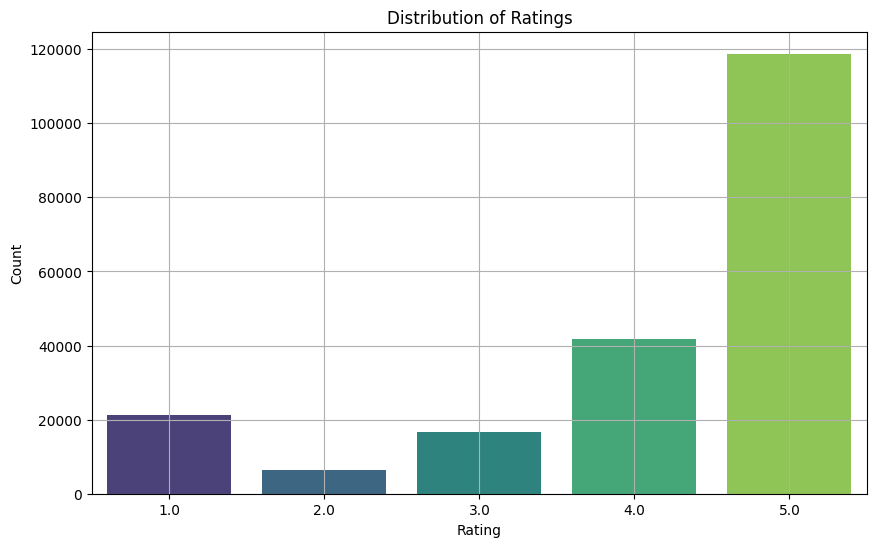

In [21]:
plt.figure(figsize=(10, 6))
sns.countplot(x='Rate', data=dataFrame, palette='viridis')
plt.title('Distribution of Ratings')
plt.xlabel('Rating')
plt.ylabel('Count')
plt.grid(True)
plt.show()

Corpus Length: 2481335


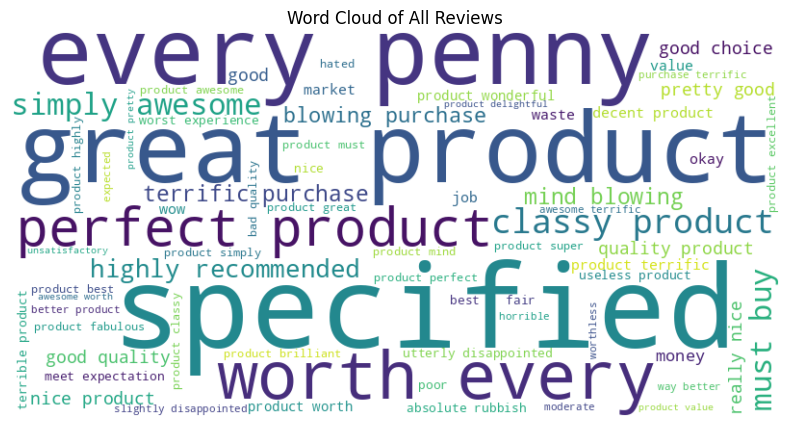

In [24]:
def plot_wordcloud(text_series, title):
    # Convert non-string entries to strings and handle missing values
    text_series = text_series.fillna('')  # Replace NaN values with empty strings
    text_series = text_series.astype(str)  # Ensure all entries are strings

    corpus = ' '.join(text_series)

    if not corpus:
        print("The corpus is empty. Check the text_series data.")
        return

    print(f"Corpus Length: {len(corpus)}")  # Debugging statement

    # Generate word cloud
    wordcloud = WordCloud(width=800, height=400, background_color='white',
                          stopwords=STOPWORDS, min_font_size=10).generate(corpus)

    plt.figure(figsize=(10, 5))
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.axis('off')
    plt.title(title)
    plt.show()

# Example usage
plot_wordcloud(dataFrame['Review'], 'Word Cloud of All Reviews')


<ipython-input-25-f40cb0d83964>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='Sentiment', data=dataFrame, palette='coolwarm')


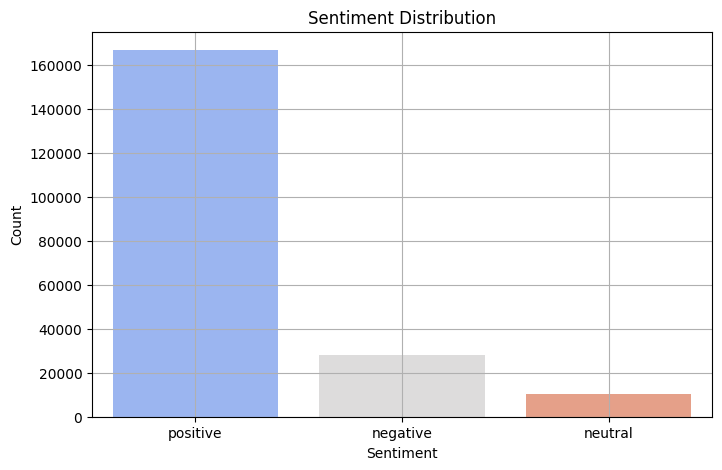

In [25]:
# Sentiment Analysis Visualization
plt.figure(figsize=(8, 5))
sns.countplot(x='Sentiment', data=dataFrame, palette='coolwarm')
plt.title('Sentiment Distribution')
plt.xlabel('Sentiment')
plt.ylabel('Count')
plt.grid(True)
plt.show()


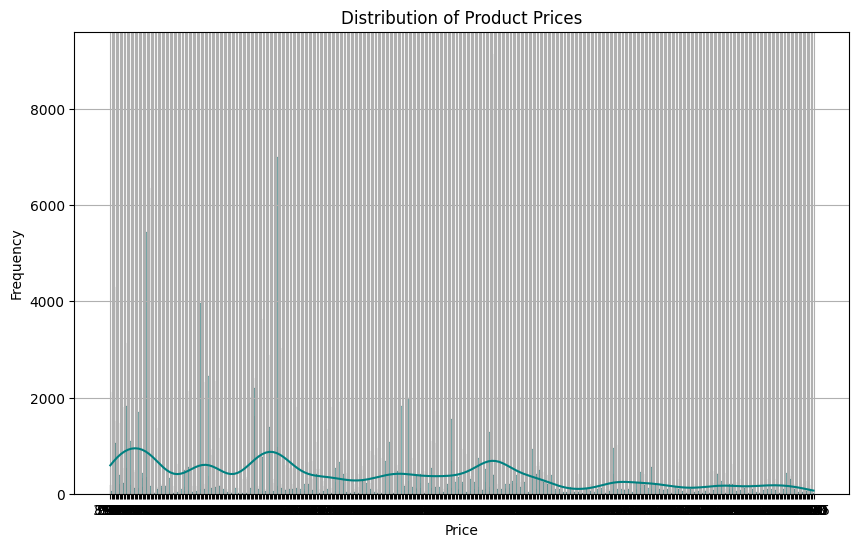

In [26]:
# Product Price Distribution
plt.figure(figsize=(10, 6))
sns.histplot(dataFrame['product_price'], kde=True, color='teal')
plt.title('Distribution of Product Prices')
plt.xlabel('Price')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()


In [27]:
# Prepare data for classification
X = dataFrame['Review']
y = dataFrame['Sentiment'].map({'positive': 1, 'negative': 0})

In [28]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [30]:
from sklearn.feature_extraction.text import TfidfVectorizer

In [35]:
X = dataFrame['Review'].fillna('').astype(str)  # Fill NaN and ensure strings
y = dataFrame['Rate'] - 1  # Adjust labels to start from 0

In [36]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=42)

In [37]:
# Tokenize and pad text data
tokenizer = Tokenizer(num_words=5000)
tokenizer.fit_on_texts(X_train)
X_train_seq = tokenizer.texts_to_sequences(X_train)
X_test_seq = tokenizer.texts_to_sequences(X_test)
X_train_pad = pad_sequences(X_train_seq, maxlen=100)
X_test_pad = pad_sequences(X_test_seq, maxlen=100)

In [38]:
# Define and train a classification model
model = tf.keras.models.Sequential([
    tf.keras.layers.Embedding(input_dim=5000, output_dim=50, input_length=100),
    tf.keras.layers.Bidirectional(tf.keras.layers.LSTM(64, return_sequences=True)),
    tf.keras.layers.GlobalAveragePooling1D(),
    tf.keras.layers.Dense(5, activation='softmax')
])

/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/embedding.py:90: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


In [39]:
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

In [40]:
# Train the model
history = model.fit(X_train_pad, y_train, validation_data=(X_test_pad, y_test), epochs=10)



Epoch 1/10
5767/5767 ━━━━━━━━━━━━━━━━━━━━ 560s 97ms/step - accuracy: 0.7524 - loss: 0.6604 - val_accuracy: 0.9017 - val_loss: 0.2892
Epoch 2/10
5767/5767 ━━━━━━━━━━━━━━━━━━━━ 562s 97ms/step - accuracy: 0.8997 - loss: 0.2896 - val_accuracy: 0.8899 - val_loss: 0.2801
Epoch 3/10
5767/5767 ━━━━━━━━━━━━━━━━━━━━ 557s 97ms/step - accuracy: 0.8996 - loss: 0.2811 - val_accuracy: 0.9019 - val_loss: 0.2759
Epoch 4/10
5767/5767 ━━━━━━━━━━━━━━━━━━━━ 563s 97ms/step - accuracy: 0.9015 - loss: 0.2727 - val_accuracy: 0.9021 - val_loss: 0.2697
Epoch 5/10
5767/5767 ━━━━━━━━━━━━━━━━━━━━ 560s 96ms/step - accuracy: 0.9015 - loss: 0.2687 - val_accuracy: 0.9023 - val_loss: 0.2691
Epoch 6/10
5767/5767 ━━━━━━━━━━━━━━━━━━━━ 566s 97ms/step - accuracy: 0.9028 - loss: 0.2656 - val_accuracy: 0.9023 - val_loss: 0.2686
Epoch 7/10
5767/5767 ━━━━━━━━━━━━━━━━━━━━ 560s 97ms/step - accuracy: 0.9037 - loss: 0.2635 - val_accuracy: 0.9026 - val_loss: 0.2676
Epoch 8/10
5767/5767 ━━━━━━━━━━━━━━━━━━━━ 562s 97ms/step - accuracy: 

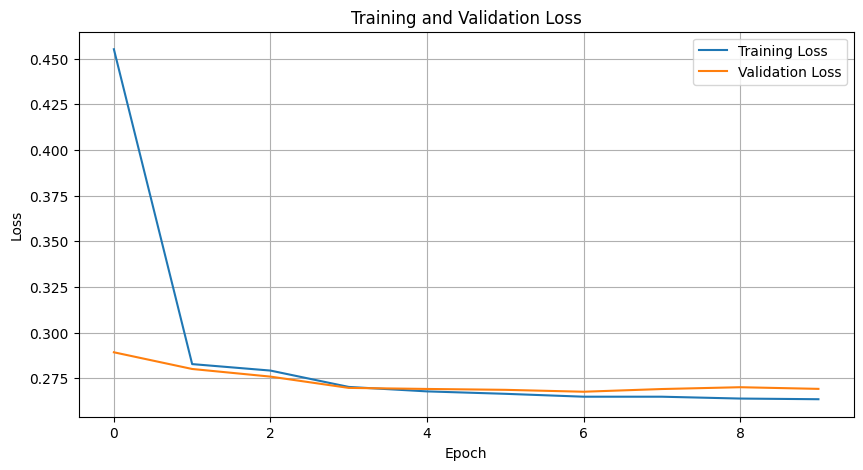

In [41]:
# Plot training history
plt.figure(figsize=(10, 5))
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.legend()
plt.title('Training and Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.grid(True)
plt.show()

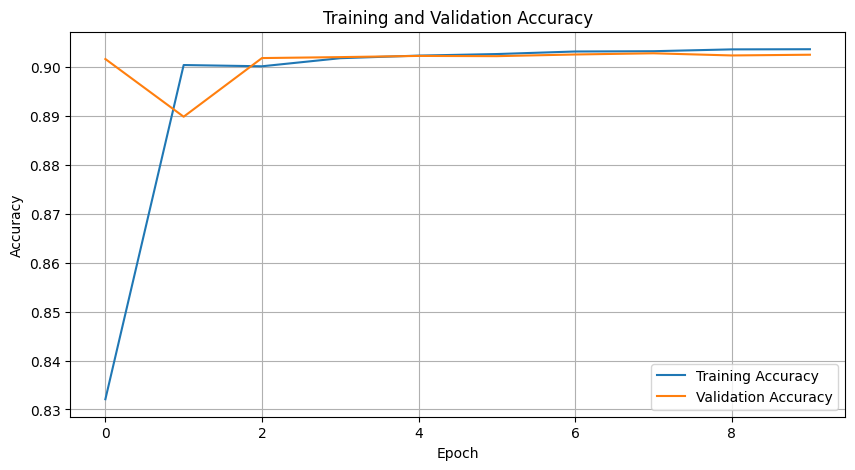

In [42]:
plt.figure(figsize=(10, 5))
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.legend()
plt.title('Training and Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.grid(True)
plt.show()

In [43]:
# Evaluate the model
y_pred = model.predict(X_test_pad)
y_pred = np.argmax(y_pred, axis=1)

641/641 ━━━━━━━━━━━━━━━━━━━━ 20s 30ms/step


In [44]:
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

[[ 1722     6     1     0   374]
 [    2   493     2     2   134]
 [    3     3  1299     5   374]
 [    0     1    11  3148  1029]
 [    4     2    12    33 11845]]
              precision    recall  f1-score   support

         0.0       0.99      0.82      0.90      2103
         1.0       0.98      0.78      0.87       633
         2.0       0.98      0.77      0.86      1684
         3.0       0.99      0.75      0.85      4189
         4.0       0.86      1.00      0.92     11896

    accuracy                           0.90     20505
   macro avg       0.96      0.82      0.88     20505
weighted avg       0.91      0.90      0.90     20505



In [46]:
from sklearn.metrics import classification_report, confusion_matrix

In [49]:
model.compile(optimizer='Adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])


In [55]:
model.save('/content/drive/My Drive/models/my_model.h5')

In [56]:
model = tf.keras.models.load_model('/content/drive/My Drive/models/my_model.h5')

In [57]:
# Predict on test data
y_pred = model.predict(X_test_pad)
y_pred_classes = np.argmax(y_pred, axis=1)

641/641 ━━━━━━━━━━━━━━━━━━━━ 19s 28ms/step


In [58]:
# Evaluation
print("Classification Report:\n", classification_report(y_test, y_pred_classes))
conf_matrix = confusion_matrix(y_test, y_pred_classes)
print("Confusion Matrix:\n", conf_matrix)

Classification Report:
               precision    recall  f1-score   support

         0.0       0.99      0.82      0.90      2103
         1.0       0.98      0.78      0.87       633
         2.0       0.98      0.77      0.86      1684
         3.0       0.99      0.75      0.85      4189
         4.0       0.86      1.00      0.92     11896

    accuracy                           0.90     20505
   macro avg       0.96      0.82      0.88     20505
weighted avg       0.91      0.90      0.90     20505

Confusion Matrix:
 [[ 1722     6     1     0   374]
 [    2   493     2     2   134]
 [    3     3  1299     5   374]
 [    0     1    11  3148  1029]
 [    4     2    12    33 11845]]


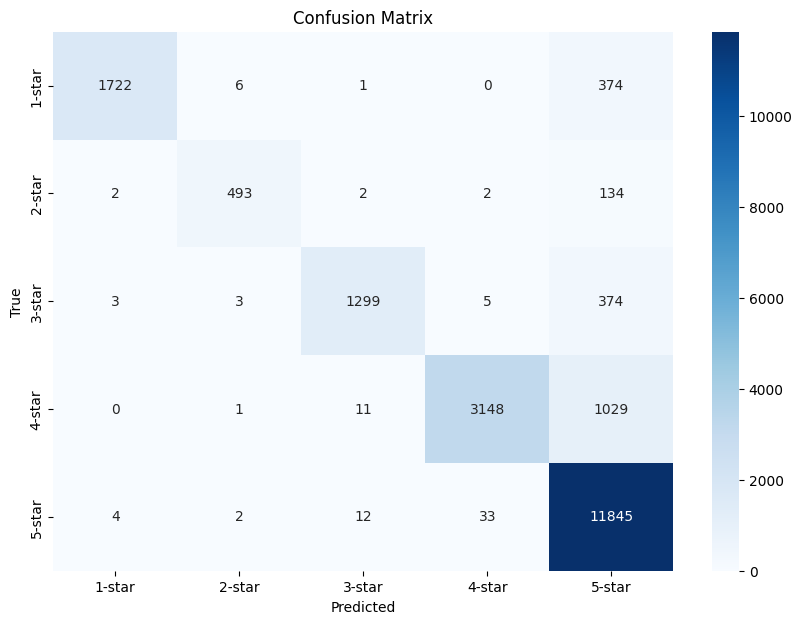

In [59]:
# Plot Confusion Matrix
plt.figure(figsize=(10,7))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=['1-star', '2-star', '3-star', '4-star', '5-star'], yticklabels=['1-star', '2-star', '3-star', '4-star', '5-star'])
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()